## Import


In [1]:
! pip install pandas numpy
! pip install matplotlib seaborn

  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.3 MB/s eta 0:00:00:00:0100:01
  Using cached contourpy-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (322 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pillow-10.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)


In [2]:

import pandas as pd
import numpy as np

import os

## File Loading


In [3]:
SEEDS = ['actor', 
         'amusement_park', 
         'band', 
         'championship', 
         'chemical_element', 
         'company', 
         'comune', 
         'dialect', 
         'film', 
         'scientist', 
         'sculpture', 
         'university', 
         'vehicle', 
         'video_game']


SIZES = [2,3,4,5,6]

In [4]:
# read the names of the subfolders in experiments

print(os.listdir('../24-09-13'))

merged = None


for seed in SEEDS:
    for size in SIZES:
        _tmp = pd.read_csv(f'../24-09-13/{seed}/{size}.csv', sep=';')
        if merged is None:
            merged = _tmp
        else:
            merged = pd.concat([merged, _tmp])

# drop the "Unnamed: N"-like columns

to_remove = [col for col in merged.columns if 'Unnamed' in col]

for col in to_remove:
    merged = merged.drop(col, axis=1)

#merged = merged.drop('Unnamed: 20', axis=1)

print(merged.columns) 
print(merged.shape)

        



['university', 'company', 'comune', 'amusement_park', 'film', 'vehicle', 'chemical_element', 'scientist', 'video_game', 'championship', 'actor', 'sculpture', 'dialect', 'band']
Index(['SEED', 'UNIT', 'UNIT_SIZE', 'SUMMARY_SIZES', 'WT_SUMMARY_SIZES',
       'SUMMARY_TILDE_SIZES', 'OLDKER_SIZE', 'WT_OLDKER_SIZE', 'NEWKER_SIZE',
       'WT_NEWKER_SIZE', 'OLDCORE_SIZE', 'WT_OLDCORE_SIZE', 'NEWCORE_SIZE',
       'WT_NEWCORE_SIZE', 'SUMMARY_COMPUTATION_TIME',
       'SUMMARY_TILDE_COMPUTATION_TIME', 'OLDKER_COMPUTATION_TIME',
       'NEWKER_COMPUTATION_TIME', 'OLDCORE_COMPUTATION_TIME',
       'NEWCORE_COMPUTATION_TIME'],
      dtype='object')
(700000, 20)


In [5]:
# print the types of all columns

print(merged.dtypes)

SEED                               object
UNIT                               object
UNIT_SIZE                           int64
SUMMARY_SIZES                      object
WT_SUMMARY_SIZES                   object
SUMMARY_TILDE_SIZES                object
OLDKER_SIZE                        object
WT_OLDKER_SIZE                     object
NEWKER_SIZE                         int64
WT_NEWKER_SIZE                      int64
OLDCORE_SIZE                      float64
WT_OLDCORE_SIZE                   float64
NEWCORE_SIZE                        int64
WT_NEWCORE_SIZE                     int64
SUMMARY_COMPUTATION_TIME          float64
SUMMARY_TILDE_COMPUTATION_TIME    float64
OLDKER_COMPUTATION_TIME            object
NEWKER_COMPUTATION_TIME           float64
OLDCORE_COMPUTATION_TIME          float64
NEWCORE_COMPUTATION_TIME          float64
dtype: object


In [6]:
to_drop = []

# drop columns that are not useful for the analysis

to_drop = [col for col in merged.columns if '_TIME' in col]


# need to drop: OLDKER_SIZE, WT_OLDKER_SIZE, OLDCORE_SIZE, WT_OLCORE_SIZE

to_drop += ['OLDKER_SIZE', 'WT_OLDKER_SIZE', 'OLDCORE_SIZE', 'WT_OLDCORE_SIZE']

# drop the columns


for col in to_drop:
    merged = merged.drop(col, axis=1)

In [7]:
print(merged.dtypes)

SEED                   object
UNIT                   object
UNIT_SIZE               int64
SUMMARY_SIZES          object
WT_SUMMARY_SIZES       object
SUMMARY_TILDE_SIZES    object
NEWKER_SIZE             int64
WT_NEWKER_SIZE          int64
NEWCORE_SIZE            int64
WT_NEWCORE_SIZE         int64
dtype: object


In [8]:
# FOR THE SUMMARIES, WE NEED TO SEPARATE EACH ENTITY OF THE UNIT 

# new dataframe having: SEED, ENTITY, SUMMARY_SIZE, WT_SUMMARY_SIZE, SUMMARY_TILDE_SIZE

# we need to split the columns



summary_df = pd.DataFrame(columns=["SEED", "ENTITY", "SUMMARY_SIZE", "WT_SUMMARY_SIZE", "SUMMARY_TILDE_SIZE"])

new_rows = []
for index, row in merged.iterrows():
    entities = row['UNIT'].split(',')
    summary_sizes = row['SUMMARY_SIZES'].split(',')
    wt_summary_sizes = row['WT_SUMMARY_SIZES'].split(',')
    summary_tilde_sizes = row['SUMMARY_TILDE_SIZES'].split(',')

    assert len(entities) == len(summary_sizes) == len(wt_summary_sizes) == len(summary_tilde_sizes)

    for i in range(len(entities)):
        new_rows.append([row['SEED'], entities[i], summary_sizes[i], wt_summary_sizes[i], summary_tilde_sizes[i]])

summary_df = pd.DataFrame(new_rows, columns=["SEED", "ENTITY", "SUMMARY_SIZE", "WT_SUMMARY_SIZE", "SUMMARY_TILDE_SIZE"])


print(summary_df)







               SEED        ENTITY SUMMARY_SIZE WT_SUMMARY_SIZE  \
0             actor  bn:00915979n          260             519   
1             actor  bn:02426205n          265             528   
2             actor  bn:15939213n          257             512   
3             actor  bn:05144812n          256             512   
4             actor  bn:02688185n          260             519   
...             ...           ...          ...             ...   
2799995  video_game  bn:03515031n          170             340   
2799996  video_game  bn:15918044n          151             302   
2799997  video_game  bn:00633493n          156             312   
2799998  video_game  bn:00284836n          156             312   
2799999  video_game  bn:02657046n          169             336   

        SUMMARY_TILDE_SIZE  
0                        6  
1                       12  
2                        5  
3                        5  
4                        8  
...                    ...  
2799

In [9]:
# three new columns to add to the summary_df: 'TOP_SUMMARY_RATIO', 'TOP_TILDE_RATIO', 'NOTOP_TILDE_RATIO'

# we need to calculate the ratios

summary_df['TOP_SUMMARY_RATIO'] = summary_df['WT_SUMMARY_SIZE'].astype(int) / summary_df['SUMMARY_SIZE'].astype(int)
summary_df['TOP_TILDE_RATIO'] = summary_df['WT_SUMMARY_SIZE'].astype(int) / summary_df['SUMMARY_TILDE_SIZE'].astype(int)
summary_df['NOTOP_TILDE_RATIO'] = summary_df['SUMMARY_SIZE'].astype(int) / summary_df['SUMMARY_TILDE_SIZE'].astype(int)
 


In [10]:
# FOR EACH SEED I WANT TO STORE THE AVERAGE OF WT_SUMMARY_SIZE, SUMMARY_SIZE, SUMMARY_TILDE_SIZE AND THE RATIOS
# in a csv file 

summary_ratios = []

for seed in SEEDS:
    _tmp = summary_df[summary_df['SEED'] == seed]
    summary_ratios.append([seed, _tmp['WT_SUMMARY_SIZE'].astype(int).mean(), _tmp['SUMMARY_SIZE'].astype(int).mean(), _tmp['SUMMARY_TILDE_SIZE'].astype(int).mean(), _tmp['TOP_SUMMARY_RATIO'].mean(), _tmp['TOP_TILDE_RATIO'].mean(), _tmp['NOTOP_TILDE_RATIO'].mean()])

summary_ratios = pd.DataFrame(summary_ratios, columns=['SEED', 'WT_SUMMARY_SIZE', 'SUMMARY_SIZE', 'SUMMARY_TILDE_SIZE', 'TOP_SUMMARY_RATIO', 'TOP_TILDE_RATIO', 'NOTOP_TILDE_RATIO'])

print(summary_ratios)

summary_ratios.to_csv('summary_ratios.csv', sep=';', index=False)



                SEED  WT_SUMMARY_SIZE  SUMMARY_SIZE  SUMMARY_TILDE_SIZE  \
0              actor       519.890265    260.455575            6.694740   
1     amusement_park       276.342320    138.265245            3.889175   
2               band       273.557760    136.898740            2.883830   
3       championship       307.850750    154.723845            4.180740   
4   chemical_element       228.388075    125.149535            5.057490   
5            company       469.996955    235.304820            3.915045   
6             comune       641.193055    320.615320           11.986540   
7            dialect       305.887115    171.197975            2.538780   
8               film       180.347180     90.517490           11.896130   
9          scientist       534.803660    268.017065            9.864155   
10         sculpture       268.554825    134.410240            7.058285   
11        university       303.931005    152.185130            3.014685   
12           vehicle     

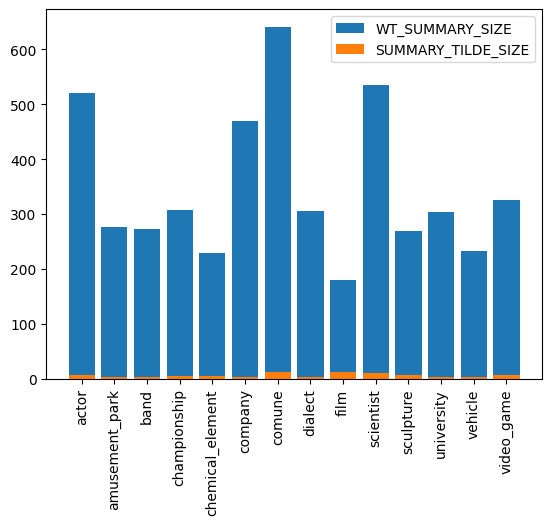

In [20]:
# now i want a bar plot

# in x-axis (rotated) the SEEDS
# in y-axis the values of the columns: WT_SUMMARY_SIZE, SUMMARY_SIZE, SUMMARY_TILDE_SIZE (same bar)

import matplotlib.pyplot as plt

for col in ['WT_SUMMARY_SIZE', 'SUMMARY_TILDE_SIZE']:
    plt.bar(summary_ratios['SEED'], summary_ratios[col], label=col)

plt.xticks(rotation=90)
plt.legend()
plt.show()

In [14]:
# i want a new dataframe with the following: SEED, UNIT, UNIT_SIZE, WT_NEWKER_SIZE, NEWKER_SIZE, NEWCORE_SIZE, WT_NEWCORE_SIZE
# no unpacking needed
# just a projection of the columns

new_df = merged[['SEED', 'UNIT', 'UNIT_SIZE', 'WT_NEWKER_SIZE', 'NEWKER_SIZE', 'NEWCORE_SIZE', 'WT_NEWCORE_SIZE']]

print(new_df.shape)


(700000, 7)


In [18]:
# in new_df i want to add the following columns: 'top_coreker_ratio', 'notop_coreker_ratio'

new_df['top_coreker_ratio'] = new_df['WT_NEWCORE_SIZE'].astype(int) / new_df['WT_NEWKER_SIZE'].astype(int)

new_df['notop_coreker_ratio'] = new_df['NEWCORE_SIZE'].astype(int) / new_df['NEWKER_SIZE'].astype(int)

new_df['top_notop_ratio'] = new_df['WT_NEWCORE_SIZE'] / new_df['NEWKER_SIZE']

# group by SEED and calculate the mean of the ratios and the sizes

new_ratios = []

for seed in SEEDS:
    _tmp = new_df[new_df['SEED'] == seed]
    new_ratios.append([seed, _tmp['WT_NEWKER_SIZE'].astype(int).mean(), _tmp['NEWKER_SIZE'].astype(int).mean(), _tmp['NEWCORE_SIZE'].astype(int).mean(), _tmp['WT_NEWCORE_SIZE'].astype(int).mean(), _tmp['top_coreker_ratio'].mean(), _tmp['notop_coreker_ratio'].mean(), _tmp['top_notop_ratio'].mean()])


new_ratios = pd.DataFrame(new_ratios, columns=['SEED', 'WT_NEWKER_SIZE', 'NEWKER_SIZE', 'NEWCORE_SIZE', 'WT_NEWCORE_SIZE', 'top_coreker_ratio', 'notop_coreker_ratio', 'top_notop_ratio'])

print(new_ratios)

new_ratios.to_csv('new_ratios.csv', sep=';', index=False)


                SEED  WT_NEWKER_SIZE  NEWKER_SIZE  NEWCORE_SIZE  \
0              actor         7.54480      3.50686     254.51884   
1     amusement_park         4.83320      1.91668     119.27190   
2               band         4.43930      1.71968     123.44452   
3       championship         4.39382      1.69776     127.77020   
4   chemical_element         4.70754      1.90230      44.20546   
5            company         4.59180      1.79598     192.00712   
6             comune        12.80386      5.90196     313.90274   
7            dialect         4.19346      1.60452     134.46642   
8               film         7.85422      3.43534      39.09970   
9          scientist         8.28902      3.76020     234.20552   
10         sculpture         9.86856      4.43454      70.47124   
11        university         3.79548      1.39822     139.50980   
12           vehicle         3.68278      1.34232      61.98046   
13        video_game         6.58122      2.79474     152.8200

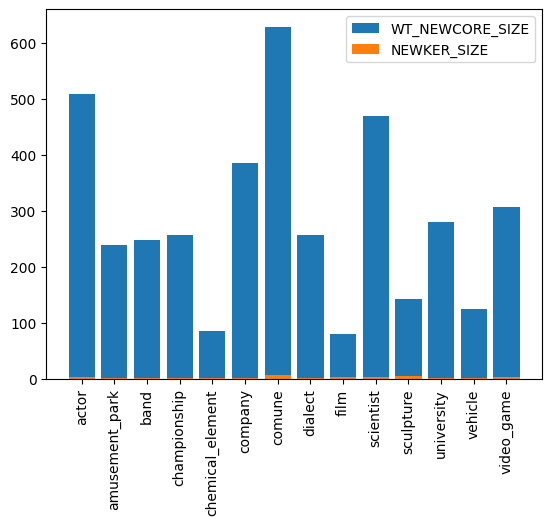

In [19]:
# from new_ratios i want to plot the following columns: 'WT_NEWCORE_SIZE', 'NEWCORE_SIZE', 'WT_NEWKER_SIZE', 'NEWKER_SIZE'

for col in ['WT_NEWCORE_SIZE',  'NEWKER_SIZE']:

    plt.bar(new_ratios['SEED'], new_ratios[col], label=col)

plt.xticks(rotation=90)
plt.legend()
plt.show()
